In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import cosine, correlation


In [103]:
# read data
# r_cols = ['', 'userId', 'rating', 'timestamp', 'tmdbId']
r_cols = ['movieId', 'tagId', 'relevance']
ratings = pd.read_csv('~/Downloads/genome-scores.csv', 
                      names=r_cols, 
                      usecols=r_cols, 
                      header=0, 
                      index_col=0,
#                       dtype={'userId':'int', 
#                              'rating':'float64',
#                              'timestamp':'int64',
#                              'tmdbId':'int64',
#                             }
                     )

# ratings.drop('timestamp', inplace = True, axis=1)
# ratings.groupby('movieId')
ratings

/Users/will/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,tagId,relevance
movieId,,
1,1,0.02875
1,2,0.02375
1,3,0.06250
1,4,0.07575
1,5,0.14075
1,6,0.14675
1,7,0.06350
1,8,0.20375
1,9,0.20200


In [95]:
# f, ax = plt.subplots(figsize=(1200, 6))
# sns.kdeplot(ratings.movieId, ratings.tagId, ax=ax)

AttributeError: 'DataFrame' object has no attribute 'movieId'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a21482158> (for post_execute):


ValueError: Image size of 86400x432 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 86400x432 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 86400x432 with 1 Axes>

In [108]:
ratings_df = pd.DataFrame(ratings.groupby(['tagId'])['relevance'].mean())
# ratings_df.drop('relevance', inplace=True, axis=1)
ratings_df['numberOfMovies'] = ratings.groupby(['tagId'])['relevance'].count()
ratings_df

,relevance,numberOfMovies
tagId,,
1,0.046596,13816
2,0.044771,13816
3,0.078292,13816
4,0.085599,13816
5,0.129250,13816
6,0.088348,13816
7,0.074092,13816
8,0.180610,13816
9,0.096887,13816


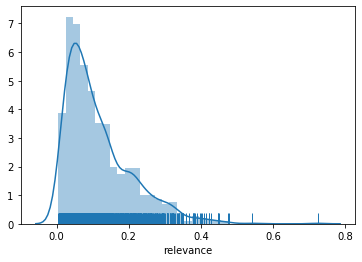

In [112]:
sns.distplot(ratings_df.relevance, kde=True, rug=True);
# sns.jointplot(x='numberOfMovies', y='relevance', data=ratings_df)

In [15]:
# read movie detail and join with ratings
# m_cols = ['id', 'title']
# movies = pd.read_csv('~/Downloads/movieDetail.csv', 
#                       usecols=m_cols, 
#                       header=0, 
#                       low_memory=False, 
#                      )
# ratings = pd.merge(ratings, movies, left_on='movieId', right_on='id')

# print(ratings)

In [36]:
movieStats = ratings.groupby('tmdbId').agg({'rating': [np.size, np.mean]})

movieStats

rating          
             size      mean
tmdbId                     
2.0         260.0  3.700000
3.0         110.0  3.700000
5.0        5374.0  3.384351
6.0        1136.0  2.923856
11.0      68717.0  4.120189
12.0      34712.0  3.833977
13.0      81491.0  4.048011
14.0      53689.0  4.107340
15.0      19091.0  4.092688
16.0       4278.0  3.837775
17.0         66.0  2.984848
18.0      33153.0  3.769945
19.0       6054.0  3.976544
20.0        676.0  3.736686
21.0        694.0  3.810519
22.0      37227.0  3.789212
24.0      33827.0  3.857821
25.0       3913.0  3.449783
26.0        207.0  3.768116
27.0        331.0  2.833837
28.0      26370.0  4.114714
30.0         41.0  3.951220
31.0          4.0  2.875000
32.0          6.0  3.583333
33.0      14802.0  3.994798
35.0       9175.0  3.397112
38.0      33225.0  4.066351
55.0       6341.0  3.994953
58.0      16056.0  3.457057
59.0       5087.0  3.624926
...           ...       ...
642203.0      4.0  2.625000
642661.0      3.0  2.500000
642749.0      1.0  3.500000
644029.0      5.0  3.200000
646150.0      1.0  2.000000
646282.0      1.0  1.000000
646767.0     37.0  3.635135
647729.0      1.0  5.000000
649055.0     84.0  2.654762
649643.0     28.0  3.232143
652754.0     26.0  2.942308
653528.0    205.0  3.326829
654589.0     28.0  2.803571
655025.0      3.0  2.166667
656371.0    174.0  3.620690
657353.0      3.0  3.333333
657743.0     18.0  3.194444
657748.0      5.0  2.700000
659433.0      1.0  3.500000
660785.0     11.0  2.545455
661045.0     12.0  3.625000
661066.0      2.0  3.250000
661356.0     12.0  2.916667
661488.0      3.0  2.500000
665848.0      1.0  2.500000
666606.0      1.0  3.000000
668372.0      2.0  3.250000
670678.0    104.0  3.552885
671149.0     27.0  3.000000
671528.0     11.0  3.500000

[58500 rows x 2 columns]

In [ ]:
# create pivot table
userRatings = ratings.pivot_table(index=['userId'], columns=['tmdbId'], values='rating')

userRatings

In [18]:
# create correlation matrix using Pearson Relation
corrMatrix = userRatings.corr(method='pearson')

corrMatrix

movieId,1,2,3,4,5,6,7,8,9,10,...,174055,175303,175569,176371,176423,177593,177615,177765,184797,187595
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.363803,NaN,NaN,-1.0,-0.610170,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.363803,1.000000,NaN,NaN,NaN,0.481869,NaN,NaN,NaN,0.943880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,-0.500000,1.0,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.610170,0.481869,-0.5,NaN,NaN,1.000000,NaN,NaN,NaN,0.342997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
